<a href="https://colab.research.google.com/github/menon92/DL-Sneak-Peek/blob/master/audio/audio_feature_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
from matplotlib import pyplot as plt
import IPython.display as ipd

In [ ]:
audio_path = "test_wav_070078fb60.wav"

# play audio file
ipd.Audio(audio_path)

In [ ]:

y, sr = librosa.load(audio_path, sr=16000)

print(f"sample rate: {sr}")
print(f"data shape: {y.shape}")

sample rate: 16000
data shape: (76800,)


In [ ]:
plt.rcParams["figure.figsize"] = (20, 3)

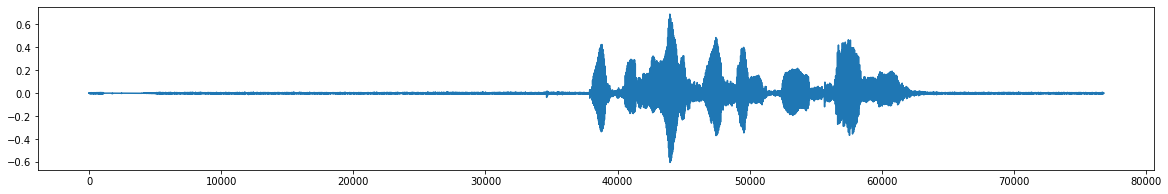

In [ ]:
plt.plot(y)
plt.show()

In [ ]:
mfcc_feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

In [ ]:
print(mfcc_feature.shape)

(40, 151)


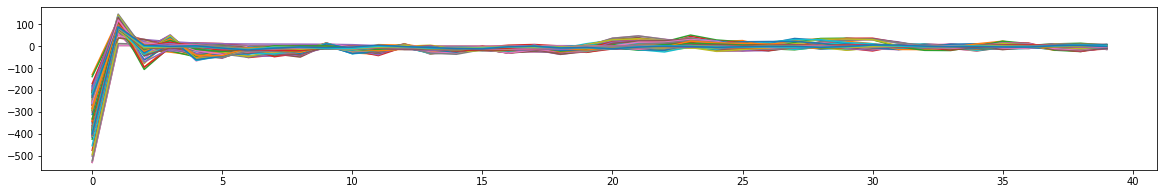

In [ ]:
plt.plot(mfcc_feature)
plt.show()

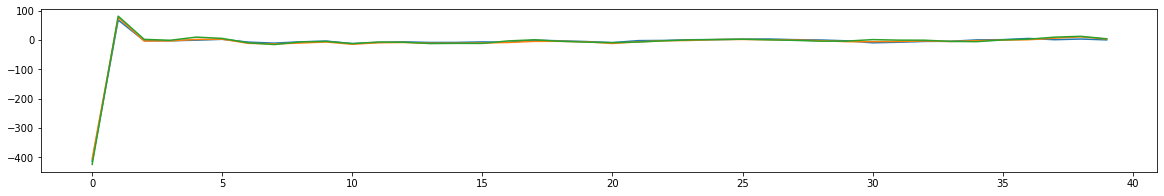

In [ ]:
plt.plot(mfcc_feature[:,:3])
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf


audio = tf.io.read_file(audio_path)
audio, _ = tf.audio.decode_wav(audio, 1)
audio = tf.squeeze(audio, axis=-1)
stfts = tf.signal.stft(audio, frame_length=200, frame_step=80, fft_length=256)
x = tf.math.pow(tf.abs(stfts), 0.5)
audio_len = tf.shape(x)[0]
pad_len = 1500
paddings = tf.constant([[0, pad_len], [0, 0]])
x = tf.pad(x, paddings, "CONSTANT")[:pad_len, :]

2.9.2


In [ ]:
print(x.shape)

(1500, 129)


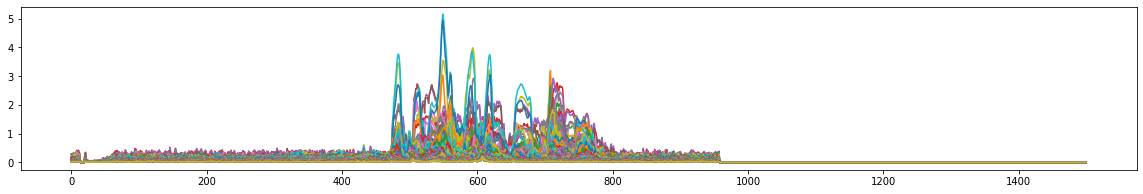

In [ ]:
plt.plot(x)
plt.show()

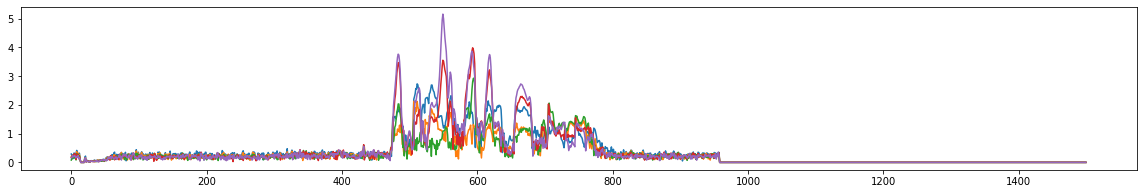

In [ ]:
plt.plot(x[:,5:10])
plt.show()